<a href="https://colab.research.google.com/github/parad13/EDA_ML/blob/main/Boston_EDA(Ridge_%26_Lasso_L1_%26_L2_regularization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
df = load_boston()

In [ ]:
dataset = pd.DataFrame(df.data)

In [ ]:
print(dataset.head())

        0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]


In [ ]:
dataset.columns = df.feature_names

In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.target.shape

(506,)

In [ ]:
dataset.price = df.target

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
dataset.price

In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
X = dataset.iloc[:, :-1] ##Indepedent features
y = dataset.iloc[:, -1] #depedent features
# X[:50],y[:50]

(       CRIM    ZN  INDUS  CHAS    NOX  ...     DIS  RAD    TAX  PTRATIO       B
 0   0.00632  18.0   2.31   0.0  0.538  ...  4.0900  1.0  296.0     15.3  396.90
 1   0.02731   0.0   7.07   0.0  0.469  ...  4.9671  2.0  242.0     17.8  396.90
 2   0.02729   0.0   7.07   0.0  0.469  ...  4.9671  2.0  242.0     17.8  392.83
 3   0.03237   0.0   2.18   0.0  0.458  ...  6.0622  3.0  222.0     18.7  394.63
 4   0.06905   0.0   2.18   0.0  0.458  ...  6.0622  3.0  222.0     18.7  396.90
 5   0.02985   0.0   2.18   0.0  0.458  ...  6.0622  3.0  222.0     18.7  394.12
 6   0.08829  12.5   7.87   0.0  0.524  ...  5.5605  5.0  311.0     15.2  395.60
 7   0.14455  12.5   7.87   0.0  0.524  ...  5.9505  5.0  311.0     15.2  396.90
 8   0.21124  12.5   7.87   0.0  0.524  ...  6.0821  5.0  311.0     15.2  386.63
 9   0.17004  12.5   7.87   0.0  0.524  ...  6.5921  5.0  311.0     15.2  386.71
 10  0.22489  12.5   7.87   0.0  0.524  ...  6.3467  5.0  311.0     15.2  392.52
 11  0.11747  12.5   7.87   

In [ ]:
# X.shape, y.shape

((506, 12), (506,))

## Linear Regression

In [ ]:
# sklearn model_selection cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [ ]:
linear_regressor = LinearRegression()
mse = cross_val_score(linear_regressor,X, y, scoring='neg_mean_squared_error', cv=5)

In [ ]:
lin_regressor, mse, 

(array([-13.27939793, -24.91249878, -20.65446206, -36.6839687 ,
        -37.98096788]),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))

In [ ]:
mean_mse = np.mean(mse)
mean_mse

-26.70225907220984

## Ridge Regression (L1 regularization)
L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.

In [ ]:
# sklean model_selection GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

In [ ]:
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 
                       30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', 
                               cv=5)                       

In [ ]:
parameters

{'alpha': [1e-15,
  1e-10,
  1e-08,
  0.001,
  0.01,
  1,
  5,
  10,
  20,
  30,
  35,
  40,
  45,
  50,
  55,
  100]}

In [ ]:
ridge_regressor.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
[ ridge_regressor.best_estimator_, ridge_regressor.best_index_,
 ridge_regressor.best_params_, ridge_regressor.best_score_ ]

[Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 15,
 {'alpha': 100},
 -22.967747596932256]

## Lasso Regression(L2 regularization)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(precompute=True)
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5,)
lasso_regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3376.929046176207, tolerance: 2.205170830569307
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3365.5255098897796, tolerance: 2.077624032
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3302.108815614, tolerance: 2.112585517382716
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the n

-22.841784268980334

In [ ]:
lasso_regressor.best_params_, lasso_regressor.best_score_, 

({'alpha': 1}, -22.841784268980334)

## train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)

In [ ]:
linear_regressor.fit(X_train, y_train)
lasso_regressor.fit(X_train, y_train)
ridge_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2210.7421764765813, tolerance: 1.4393020467844524
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2084.9320369178936, tolerance: 1.4483647267137811
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2161.794506164691, tolerance: 1.4632730463604242
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to i

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
pred_linear = linear_regressor.predict(X_test)
pred_lasso = lasso_regressor.predict(X_test)
pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
pred_linear[:5]

array([ 5.33535341, 17.12431015, 12.61220857, 22.53140994, 10.35867022])

In [ ]:
pred_lasso[:5]

array([ 5.32831146, 17.28655595, 12.88495353, 22.49501758, 10.58983303])

In [ ]:
pred_ridge[:5]

array([ 5.31835652, 17.26024645, 12.82545116, 22.40253712, 10.57616719])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


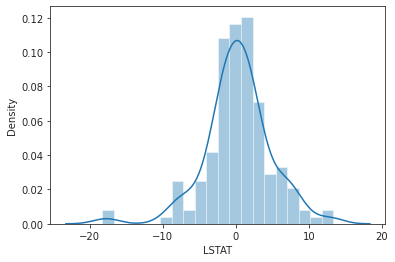

In [ ]:
sns.distplot(y_test - pred_linear)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


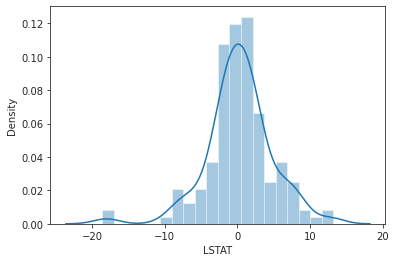

In [ ]:
#displot
sns.distplot(y_test - pred_lasso)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


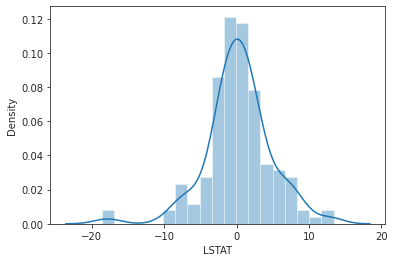

In [ ]:
sns.distplot(y_test - pred_ridge)